# TITANIC SURVIVAL PREDICTIVE ANALYSIS

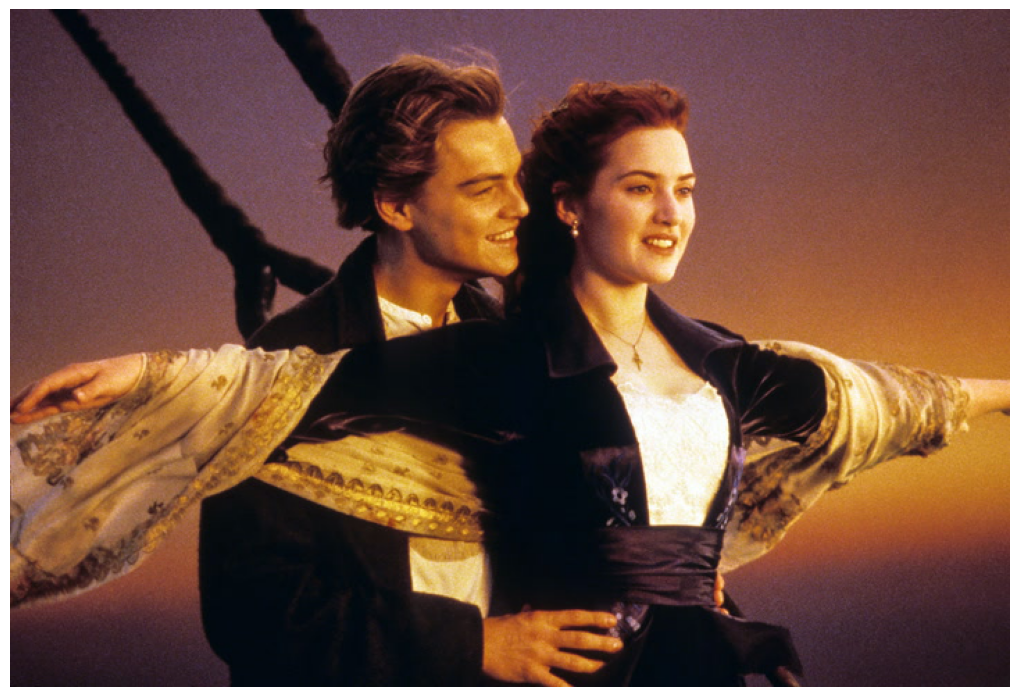

In [240]:
from PIL import Image
import matplotlib.pyplot as plt
a=Image.open("D:\Data Analytics Project\Titanic Survival Prediction Dataset/HLBVqQzy.jpg")
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(a)
ax.axis('off')
plt.subplots_adjust(left=0,right=1,top=1,bottom=0)
plt.show()

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("D:\Data Analytics Project\Titanic Survival Prediction Dataset/Titanic-Dataset.csv")

# 1. DATAPREPROCESSING

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
# Domain type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Description of the table
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Size of the Table
print('Size of the table:')
print('No.of Rows:',data.shape[0],'\nNo.of Columns:',data.shape[1])

Size of the table:
No.of Rows: 891 
No.of Columns: 12


In [7]:
# Checking null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1 (a) Drop Column

In [13]:
# Since Age and Cabin has massive missing values , so drop it

data=data.drop(columns=['Age','Cabin'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [15]:
# Now Drop the rows having null values
data.dropna(inplace=True)
data.isnull().sum() # Checking after handled with null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
# Survived =>  0 - Died , 1 - Survived
# Pclass ( Passenger Class ) => 1=1st class, 2=2nd class, 3=3rd class
# Embarked => C = Cherbourg, Q = Queenstown, S = Southampton
# SibSp - No. of Siblings or Spouses
# Parch - No. of Parents or Children

# 1 (b) Renaming Column

In [19]:
# Renaming columns 
data.rename(columns={'Pclass':'Passenger Class','SibSp':'Siblings/Spouse','Parch':'Parents/Children'},inplace=True)
data.columns

Index(['PassengerId', 'Survived', 'Passenger Class', 'Name', 'Sex',
       'Siblings/Spouse', 'Parents/Children', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# 1 (c) Replacing values or objects

In [38]:
# Replacing 0-Died, 1-Survived
data['Survived'] = data['Survived'].replace({0:'Died',1:'Survived'})
print('Survived','\n',data['Survived'].value_counts())

Survived 
 Died        549
Survived    340
Name: Survived, dtype: int64


In [35]:
# Replacing Passenger Class
data['Passenger Class'] = data['Passenger Class'].replace({1:'1st class',2:'2nd class',3:'3rd class'})
print(data.groupby('Passenger Class').size())

Passenger Class
1st class    214
2nd class    184
3rd class    491
dtype: int64


In [42]:
# Repalcing Embarked column
data['Embarked'] = data['Embarked'].replace({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})
print(data.groupby('Embarked').size())

Embarked
Cherbourg      168
Queenstown      77
Southampton    644
dtype: int64


In [39]:
data['Siblings/Spouse'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouse, dtype: int64

In [41]:
data.groupby('Parents/Children').size()

Parents/Children
0    676
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

# 1 (d) Changing datatype of the column

In [43]:
# Changing Fare Paid column to integer type
data['Fare'] = data['Fare'].astype(int)
data['Fare'].info()

<class 'pandas.core.series.Series'>
Int64Index: 889 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype
--------------  -----
889 non-null    int32
dtypes: int32(1)
memory usage: 10.4 KB


# 1 (e) Final Preview of the Data

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PassengerId       889 non-null    int64 
 1   Survived          889 non-null    object
 2   Passenger Class   889 non-null    object
 3   Name              889 non-null    object
 4   Sex               889 non-null    object
 5   Siblings/Spouse   889 non-null    int64 
 6   Parents/Children  889 non-null    int64 
 7   Fare              889 non-null    int32 
 8   Embarked          889 non-null    object
dtypes: int32(1), int64(3), object(5)
memory usage: 66.0+ KB


In [46]:
data.head()

,PassengerId,Survived,Passenger Class,Name,Sex,Siblings/Spouse,Parents/Children,Fare,Embarked
0,1,Died,3rd class,"Braund, Mr. Owen Harris",male,1,0,7,Southampton
1,2,Survived,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71,Cherbourg
2,3,Survived,3rd class,"Heikkinen, Miss. Laina",female,0,0,7,Southampton
3,4,Survived,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53,Southampton
4,5,Died,3rd class,"Allen, Mr. William Henry",male,0,0,8,Southampton


In [47]:
data.tail(5)

,PassengerId,Survived,Passenger Class,Name,Sex,Siblings/Spouse,Parents/Children,Fare,Embarked
886,887,Died,2nd class,"Montvila, Rev. Juozas",male,0,0,13,Southampton
887,888,Survived,1st class,"Graham, Miss. Margaret Edith",female,0,0,30,Southampton
888,889,Died,3rd class,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23,Southampton
889,890,Survived,1st class,"Behr, Mr. Karl Howell",male,0,0,30,Cherbourg
890,891,Died,3rd class,"Dooley, Mr. Patrick",male,0,0,7,Queenstown


# 2. DATA VISUALIZATION AND EDA

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# (i) Embarked vs Survived

In [216]:
# Embarked vs Survived
data_survived = data[data['Survived'] == 'Survived']
embarked_survived = data_survived['Embarked'].value_counts()
print('Survived by Embarked ')
print(embarked_survived)
print('Total no.of surived over Embarked:',sum(embarked_survived))


Survived by Embarked 
Southampton    217
Cherbourg       93
Queenstown      30
Name: Embarked, dtype: int64
Total no.of surived over Embarked: 340


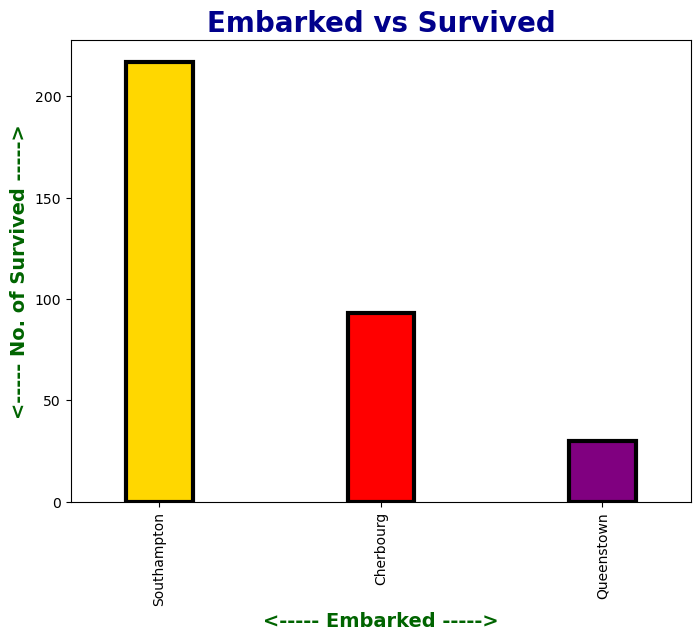

In [218]:
# Plot
plt.figure(figsize=(8,6))
embarked_survived.plot.bar(color=['gold','red','purple'],edgecolor='black',linewidth=3,width=0.3)
plt.title('Embarked vs Survived',fontsize=20,fontweight='bold',color='darkblue')
plt.xlabel('<----- Embarked ----->',fontsize=14,color='darkgreen',fontweight='bold')
plt.ylabel('<----- No. of Survived ----->',fontsize=14,color='darkgreen',fontweight='bold')
plt.show()

# (ii) Passenger Class Distribution

In [213]:
# Passenger Class Distribution
pass_class = data.groupby('Passenger Class').size()
print(pass_class)
print('Total Passenger:',sum(pass_class))

Passenger Class
1st class    214
2nd class    184
3rd class    491
dtype: int64
Total Passenger: 889


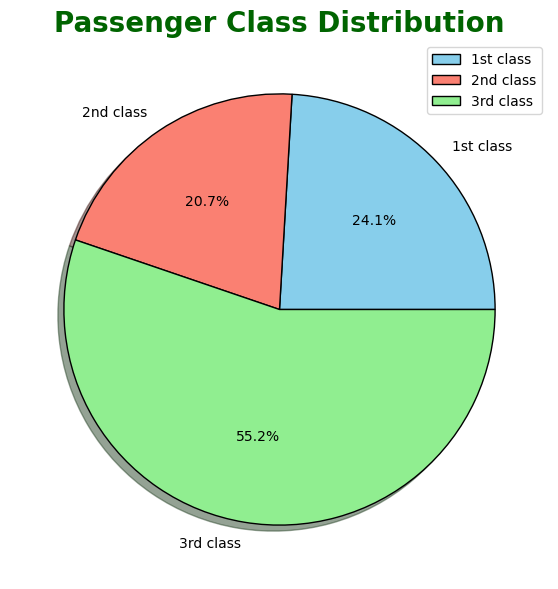

In [215]:
# Plot
plt.figure(figsize=(7,7))
pass_class.plot.pie(labels=pass_class.index,autopct="%1.1f%%",colors=['skyblue','salmon','lightgreen']
                    ,wedgeprops={'edgecolor':'black'},shadow=True)
plt.title('Passenger Class Distribution',fontsize=20,fontweight='bold',color='darkgreen')
plt.legend()
plt.show()

# (iii) Gender vs Survived

In [211]:
# Survived
survived_data = data[data['Survived'] == 'Survived']
surv_by_sex = survived_data['Sex'].value_counts()
print('Survived Ratio')
print(surv_by_sex)
print('No.of Survived:',sum(surv_by_sex))


Survived Ratio
female    231
male      109
Name: Sex, dtype: int64
No.of Survived: 340


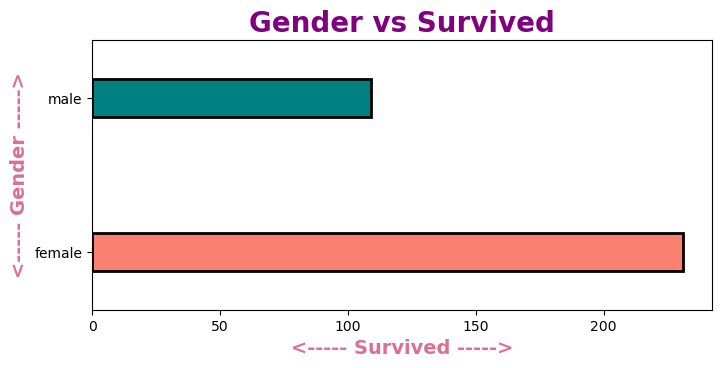

In [229]:
plt.figure(figsize=(8,3.5))
surv_by_sex.plot.barh(color=['salmon','teal'],edgecolor='black',width=0.25,linewidth=2)
plt.title('Gender vs Survived',fontsize=20,fontweight='bold',color='purple')
plt.xlabel('<----- Survived ----->',fontsize=14,fontweight='bold',color='palevioletred')
plt.ylabel('<----- Gender ----->',fontsize=14,fontweight='bold',color='palevioletred')
plt.show()


In [210]:
# Died
died_data = data[data['Survived'] == 'Died']
died_by_sex = died_data['Sex'].value_counts()
print('Died Ratio')
print(died_by_sex)
print('No.of Died:',sum(died_by_sex))

Died Ratio
male      468
female     81
Name: Sex, dtype: int64
No.of Died: 549


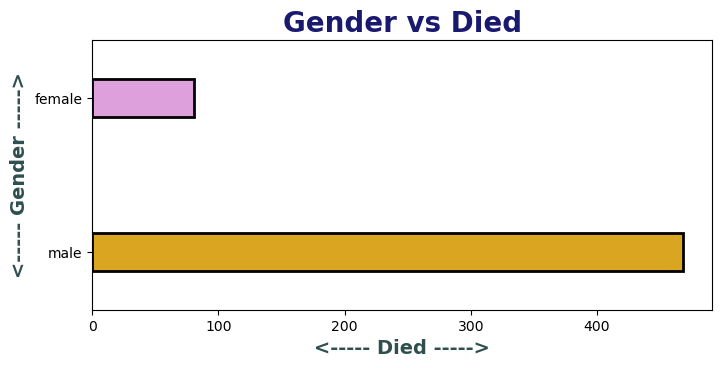

In [228]:
# Plot
plt.figure(figsize=(8,3.5))
died_by_sex.plot.barh(color=['goldenrod','plum'],edgecolor='black',width=0.25,linewidth=2)
plt.title('Gender vs Died',fontsize=20,fontweight='bold',color='midnightblue')
plt.xlabel('<----- Died ----->',fontsize=14,fontweight='bold',color='darkslategrey')
plt.ylabel('<----- Gender ----->',fontsize=14,fontweight='bold',color='darkslategrey')
plt.show()

# (iv) Fare Paid Distribution

In [205]:
# Fare Paid more than 100
above_200 = data[data['Fare'] > 100].value_counts().sum()
print('Amount Paid more than $100:',above_200,'Passengers')

# Fare Paid less than 100
below_200 = data[data['Fare'] <= 100].value_counts().sum()
print('Amount Paid less than $100:',below_200,'Passengers')

# Max Pay
print('Max Amount Paid in the Ship:',max(data['Fare']))

Amount Paid more than $100: 53 Passengers
Amount Paid less than $100: 836 Passengers
Max Amount Paid in the Ship: 512


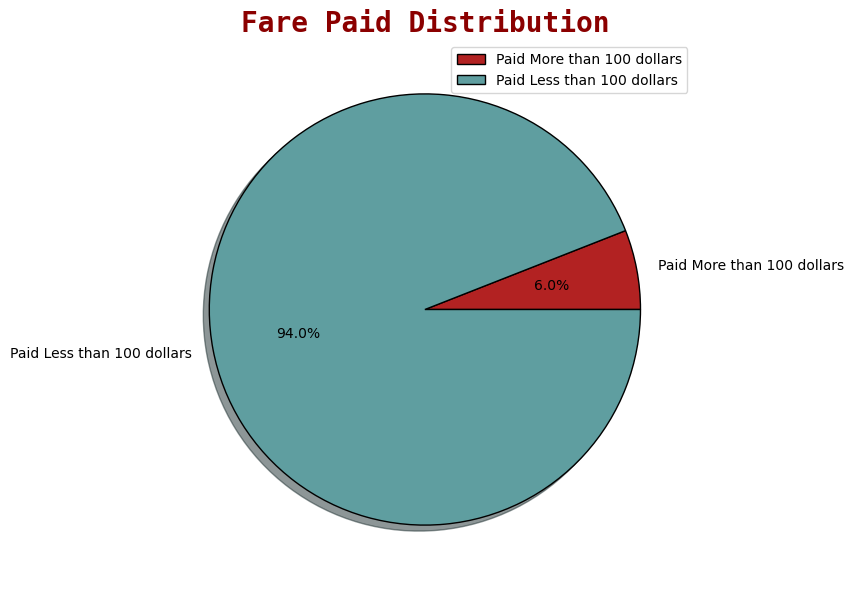

In [206]:
# Pie plot
labels = ['Paid More than 100 dollars','Paid Less than 100 dollars']
sizes = [above_200,below_200]
colors = ['firebrick','cadetblue']
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,wedgeprops={'edgecolor':'black'})
plt.title('Fare Paid Distribution',fontsize=20,fontweight='bold',color='darkred',fontname='monospace')
plt.legend()
plt.show()

# (v) Died vs Passenger Class

In [203]:
# Died vs Passenger Class
died_data = data[data['Survived'] == 'Died']
died_by_class = died_data['Passenger Class'].value_counts().sort_values()
print('Passenger Died over Class:')
print(died_by_class)
print('Total No.of Died:',sum(died_by_class))

Passenger Died over Class:
1st class     80
2nd class     97
3rd class    372
Name: Passenger Class, dtype: int64
Total No.of Died: 549


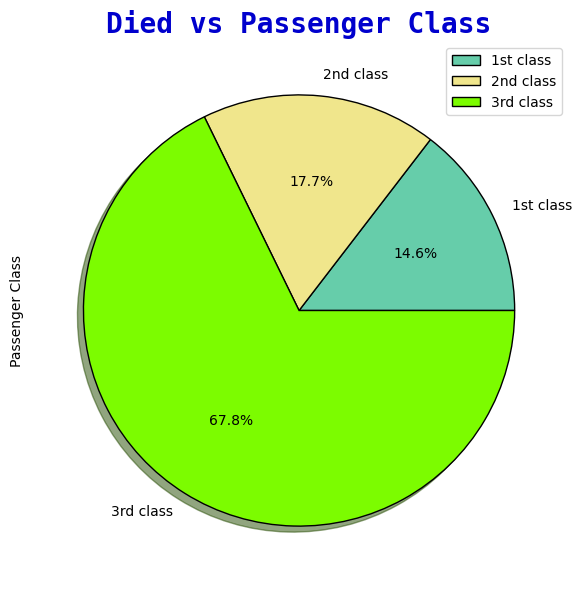

In [204]:
# Pie plot
colors=['mediumaquamarine','khaki','lawngreen']
plt.figure(figsize=(7,7))
died_by_class.plot.pie(colors=colors,autopct="%1.1f%%",shadow=True,wedgeprops={'edgecolor':'black'})
plt.title('Died vs Passenger Class',fontsize=20,color='mediumblue',fontweight='bold',fontname='monospace')
plt.legend()
plt.show()

# (vi) Embarked vs Died

In [199]:
# Embarked vs Died
data_died = data[data['Survived'] == 'Died']
embarked_died = data_died['Embarked'].value_counts()
print('No. of Died over Emabarked')
print(embarked_died)
print('Total No. of Died over Embarked:',sum(embarked_died))

No. of Died over Emabarked
Southampton    427
Cherbourg       75
Queenstown      47
Name: Embarked, dtype: int64
Total No. of Died over Embarked: 549


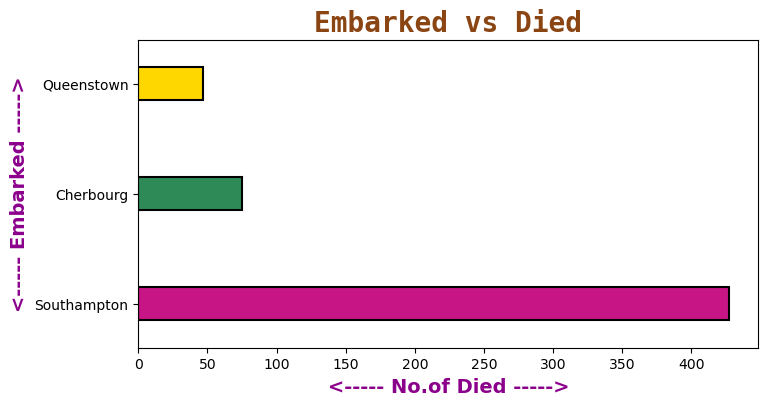

In [227]:
# Plot the data
plt.figure(figsize=(8,4))
embarked_died.plot.barh(color=['mediumvioletred','seagreen','gold'],edgecolor='black',width=0.3,linewidth=1.5)
plt.title('Embarked vs Died',fontweight='bold',fontsize=20,color='saddlebrown',fontname='monospace')
plt.xlabel('<----- No.of Died ----->',fontsize=14,fontweight='bold',color='darkmagenta')
plt.ylabel('<----- Embarked ----->',fontsize=14,fontweight='bold',color='darkmagenta')
plt.show()